[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [14]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [16]:
font_family = get_font_family()

In [17]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [18]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글'}>

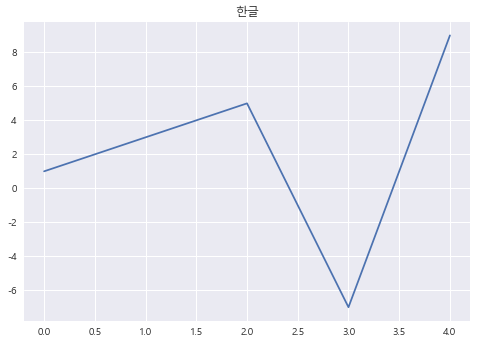

In [19]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [22]:
# 수집할 업종/테마주소
# 제약업종
url = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261'
# 2차전지
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"

In [25]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [33]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
raw = raw.dropna(how='all').dropna(axis=1, how='all')
raw.shape
# 3개의 row, 3개의 column이 제거되었습니다.

(161, 12)


(158, 9)

## 파생변수 만들기

In [36]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2022-07-12'

In [37]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [38]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,카이노스메드 *,11450.0,1520.0,+15.31%,9610.0,9930.0,125641.0,1413.0,0.0,2022-07-12
2,일동제약,38350.0,2900.0,+8.18%,36600.0,36650.0,1291093.0,49785.0,6060869.0,2022-07-12
3,이글벳 *,6640.0,470.0,+7.62%,6050.0,6150.0,362894.0,2395.0,31238.0,2022-07-12
4,애드바이오텍 *,5000.0,230.0,+4.82%,4715.0,4950.0,18666.0,91.0,54126.0,2022-07-12
5,신풍제약우,48600.0,1600.0,+3.40%,48650.0,48700.0,2085.0,101.0,29385.0,2022-07-12


## 거래량과 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

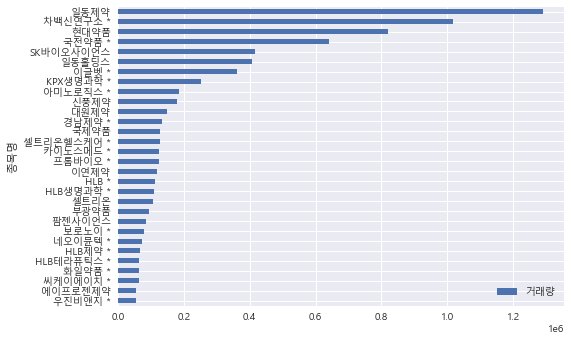

In [46]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[['종목명', '거래량']].sort_values('거래량')
temp.set_index('종목명').tail(30).plot.barh()

<AxesSubplot:ylabel='종목명'>

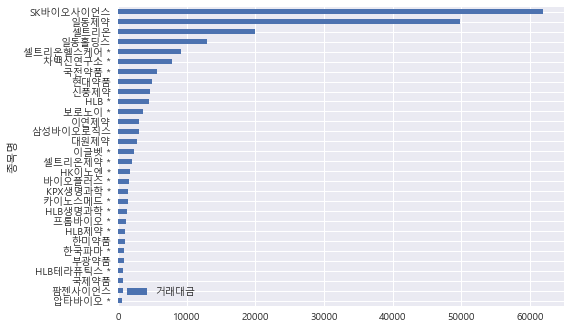

In [49]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[['종목명', '거래대금']].sort_values('거래대금')
temp.set_index('종목명').tail(30).plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [53]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw['종목명'].str.replace('*', "").str.strip()

C:\Users\HANON\AppData\Local\Temp\ipykernel_41364\1984519625.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw["종목명_전처리"] = raw['종목명'].str.replace('*', "").str.strip()


In [54]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[['종목명', '종목명_전처리']].head()

,종목명,종목명_전처리
1,카이노스메드 *,카이노스메드
2,일동제약,일동제약
3,이글벳 *,이글벳
4,애드바이오텍 *,애드바이오텍
5,신풍제약우,신풍제약우


In [56]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [59]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[['Symbol', 'Name']]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [60]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(158, 11)

In [119]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df
df = raw.merge(df_item_code_name, on="종목명_전처리", how="left")
df.shape

(158, 12)

In [63]:
# 병합이 잘 되었는지 확인합니다.
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,카이노스메드 *,11450.0,1520.0,+15.31%,9610.0,9930.0,125641.0,1413.0,0.0,2022-07-12,카이노스메드,284620
1,일동제약,38350.0,2900.0,+8.18%,36600.0,36650.0,1291093.0,49785.0,6060869.0,2022-07-12,일동제약,249420
2,이글벳 *,6640.0,470.0,+7.62%,6050.0,6150.0,362894.0,2395.0,31238.0,2022-07-12,이글벳,044960
3,애드바이오텍 *,5000.0,230.0,+4.82%,4715.0,4950.0,18666.0,91.0,54126.0,2022-07-12,애드바이오텍,179530
4,신풍제약우,48600.0,1600.0,+3.40%,48650.0,48700.0,2085.0,101.0,29385.0,2022-07-12,신풍제약우,019175


In [120]:
df[df['종목명_전처리'] == '셀트리온']

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
11,셀트리온,189500.0,3500.0,+1.88%,185000.0,185500.0,104962.0,19890.0,344098.0,2022-07-12,셀트리온,068270


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [67]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [68]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.naver?code={item_code}"
item_url

'https://finance.naver.com/item/main.naver?code=068270'

In [74]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding='cp949')
len(tables)

13

In [78]:
# 제대로 수집이 되었는지 확인합니다.
tables[3]

주요재무정보  최근 연간 실적                                 최근 분기 실적            \
       주요재무정보   2019.12   2020.12   2021.12 2022.12(E)   2021.03   2021.06   
       주요재무정보    IFRS연결    IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  11285.00  18491.00  19116.00   22016.00   4570.00   4318.00   
1        영업이익   3815.00   7186.00   7569.00    7185.00   2077.00   1632.00   
2       당기순이익   3014.00   5257.00   5958.00    5653.00   1972.00   1295.00   
3       영업이익률     33.81     38.86     39.59      32.64     45.44     37.80   
4        순이익률     26.71     28.43     31.17      25.68     43.16     30.00   
5   ROE(지배주주)     11.47     17.07     16.04      13.12     18.95     17.70   
6        부채비율     34.35     46.46     40.09        NaN     43.70     39.05   
7        당좌비율    224.94    193.38    206.23        NaN    211.48    231.39   
8         유보율   2154.50   2446.72   2833.54        NaN   2558.45   2662.43   
9      EPS(원)   2151.00   3691.00   4122.00    3857.00   1379.00    893.00   
10     PER(배)     81.11     95.47     48.04      48.22     73.72     62.33   
11     BPS(원)  19863.00  23764.00  28110.00   31601.00  25216.00  26248.00   
12     PBR(배)      8.78     14.83      7.04       5.89     12.63     10.04   
13   주당배당금(원)       NaN       NaN    735.00     672.00       NaN       NaN   
14   시가배당률(%)       NaN       NaN      0.37        NaN       NaN       NaN   
15    배당성향(%)      2.11      0.52     17.68        NaN       NaN       NaN   

                                             
     2021.09   2021.12   2022.03 2022.06(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0    4010.00   6219.00   5506.00    5211.00  
1    1640.00   2220.00   1423.00    1686.00  
2    1404.00   1286.00   1212.00    1431.00  
3      40.90     35.70     25.84      32.36  
4      35.02     20.67     22.02      27.46  
5      15.85     16.04     13.90        NaN  
6      40.41     40.09     45.28        NaN  
7     206.16    206.23    175.23        NaN  
8    2761.97   2833.54   2788.51        NaN  
9     963.00    887.00    842.00     841.00  
10     64.06     48.04     47.83     221.10  
11  27367.00  28110.00  27110.00        NaN  
12      9.31      7.04      6.33        NaN  
13       NaN       NaN       NaN        NaN  
14       NaN       NaN       NaN        NaN  
15       NaN       NaN       NaN        NaN

In [84]:
tmp = tables[3].iloc[:, [0, -1]]
tmp

,주요재무정보,최근 분기 실적
,주요재무정보,2022.06(E)
,주요재무정보,IFRS연결
0,매출액,5211.00
1,영업이익,1686.00
2,당기순이익,1431.00
3,영업이익률,32.36
4,순이익률,27.46
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [85]:
tmp.columns

MultiIndex([(  '주요재무정보',     '주요재무정보', '주요재무정보'),
            ('최근 분기 실적', '2022.06(E)', 'IFRS연결')],
           )

In [80]:
tables[6]

,0,1
0,외국인한도주식수(A),140767851
1,외국인보유주식수(B),28971049
2,외국인소진율(B/A),20.58%


In [82]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.03),추정PERlEPS,PBRlBPS (2022.03),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,140767851,28971049,20.58%,"4.00매수 l 210,200","294,935 l 139,000","52.29배 l 3,586원","49.00배 l 3,857원","6.92배 l 27,110원",0.39%,106.06배,-0.42%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [83]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [90]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [92]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [98]:
# 위에서 만든 리스트의 값을 확인합니다.
(item_info)

[            0        1
 0         매출액  5211.00
 1        영업이익  1686.00
 2       당기순이익  1431.00
 3       영업이익률    32.36
 4        순이익률    27.46
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)   841.00
 10     PER(배)   221.10
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,
             0        1
 0         매출액  5211.00
 1        영업이익  1686.00
 2       당기순이익  1431.00
 3       영업이익률    32.36
 4        순이익률    27.46
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)   841.00
 10     PER(배)   221.10
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,
           0               1
 0      시가총액  26조  3,940  억원
 1    시가총액순위         코스피 12위
 2     상장주식수       140767851
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [101]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[1]

,0,1
0,매출액,5211.00
1,영업이익,1686.00
2,당기순이익,1431.00
3,영업이익률,32.36
4,순이익률,27.46
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),841.00


In [103]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5211.0
1,영업이익,1686.0
2,당기순이익,1431.0
3,영업이익률,32.36
4,순이익률,27.46
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),841.0


## transpose를 통해 행과 열의 위치를 변경

In [104]:
df_item.set_index(0)

,1
0,
매출액,5211.0
영업이익,1686.0
당기순이익,1431.0
영업이익률,32.36
순이익률,27.46
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [105]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.03),추정PERlEPS,PBRlBPS (2022.03),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5211.0,1686.0,1431.0,32.36,27.46,NaN,NaN,NaN,NaN,841.0,...,28971049,20.58%,"4.00매수 l 210,200","294,935 l 139,000","52.29배 l 3,586원","49.00배 l 3,857원","6.92배 l 27,110원",0.39%,106.06배,-0.42%


## 개별 주가 정보를 수집하는 함수를 생성

In [107]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    # 수집한 정보를 item_info에 list 형태로 관리합니다.
    item_info = []
    
    # 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    
    # tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
    # 위에서 만든 item_info 에 리스트 형태로 추가합니다.
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [108]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.03),추정PERlEPS,PBRlBPS (2022.03),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5211.0,1686.0,1431.0,32.36,27.46,NaN,NaN,NaN,NaN,841.0,...,28971049,20.58%,"4.00매수 l 210,200","294,935 l 139,000","52.43배 l 3,586원","49.00배 l 3,857원","6.93배 l 27,110원",0.39%,106.06배,-0.09%


In [121]:
items = {"셀트리온": "068270", "신풍제약우":"019175", "일동제약": "249420"}
info_list = []
for name, code in items.items():
    info = get_item_info(code)
    info["종목명"] = name
    info_list.append(info)
# dir(items)

df_tmp = pd.concat(info_list)
df_tmp.set_index('종목명')

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.03),추정PERlEPS,PBRlBPS (2022.03),배당수익률l2021.12,동일업종 PER,동일업종 등락률,배당수익률
종목명,,,,,,,,,,,,,,,,,,,,,
셀트리온,5211.0,1686.0,1431.0,32.36,27.46,NaN,NaN,NaN,NaN,841.0,...,20.58%,"4.00매수 l 210,200","294,935 l 139,000","52.29배 l 3,586원","49.00배 l 3,857원","6.92배 l 27,110원",0.39%,106.06배,+0.27%,NaN
신풍제약우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.39%,N/A l N/A,"135,000 l 30,950",N/A l -333원,N/A l N/A,"6.91배 l 6,792원",NaN,106.06배,+0.29%,NaN
일동제약,1530.0,-60.0,-210.0,-3.92,-13.73,NaN,NaN,NaN,NaN,NaN,...,4.06%,"4.00매수 l 50,000","79,500 l 12,400","N/A l -8,637원",N/A l N/A,"5.47배 l 7,471원",NaN,106.06배,+0.27%,NaN


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [117]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [122]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/158 [00:00<?, ?it/s]

In [123]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0     매출액  영업이익  당기순이익 영업이익률   순이익률 ROE(지배주주) ...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
153    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
154    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
155    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
156    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
157    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 158, dtype: object

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [127]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df['종목코드']
del df_item_info["index"]

In [128]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2021.12),PBRlBPS (2021.12),PERlEPS(2022.02),PBRlBPS (2022.02),배당수익률l2021.11,종목코드
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,106.06배,+0.27%,NaN,NaN,NaN,NaN,NaN,NaN,284620
1,1530.0,-60.0,-210.0,-3.92,-13.73,NaN,NaN,NaN,NaN,NaN,...,NaN,106.06배,+0.29%,NaN,NaN,NaN,NaN,NaN,NaN,249420
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,106.06배,+0.27%,0.79%,NaN,NaN,NaN,NaN,NaN,044960
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,106.06배,+0.29%,NaN,N/A l -347원,"3.20배 l 1,530원",NaN,NaN,NaN,179530
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,106.06배,+0.27%,NaN,NaN,NaN,NaN,NaN,NaN,019175


In [129]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(158, 12)

## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [ ]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
# df_info

In [ ]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

In [ ]:
# 일부 데이터만 가져와서 확인합니다.


## 파일명 만들기

In [ ]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name

In [ ]:
# csv 파일로 저장합니다.


In [ ]:
# 제대로 저장되었는지 확인합니다.
